# Diminishing Returns: When More Input Produces Less Additional Output

This notebook demonstrates **diminishing returns**, one of the most important types of nonlinear relationships in business.

Understanding diminishing returns is critical because:
- **First inputs are very effective** - they capture the easiest opportunities
- **Later inputs are less effective** - they face harder challenges
- **Each additional unit produces less value** than the previous unit
- This pattern appears everywhere: marketing, production, staffing, quality improvement


## Key Concepts

**Diminishing Returns** means:
- Each additional unit of input produces less additional output than the previous unit
- The first dollar you spend is very effective
- The second dollar is still effective, but less so
- The third dollar is even less effective
- And so on...

**Why Diminishing Returns Happen**:
- The easiest opportunities get taken first (low-hanging fruit)
- Later opportunities are harder to capture
- Coordination costs increase as you scale
- Market saturation occurs

**Critical insight**: Understanding diminishing returns helps you identify optimal investment levels and avoid wasting money on investments that produce very little return.


## Scenario: Marketing Budget Optimization

You are a marketing director deciding how much to spend on a new advertising campaign. You know that marketing shows diminishing returns, but you need to understand:
- How much value does the first $1,000 produce?
- How much value does the next $1,000 produce?
- Where is the optimal investment level?
- What happens if you assume linear returns?

**Decision**: How much should you invest in marketing?


## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Model Diminishing Returns in Marketing

Let's create a model showing how marketing spend produces customers with diminishing returns:


In [2]:
# Model marketing spend with diminishing returns
# Early dollars are more effective than later dollars

def marketing_customers(marketing_spend):
    """Marketing spend produces customers with diminishing returns"""
    # Square root relationship: early dollars produce more value
    # This creates a curve that starts steep but flattens
    return 200 * np.sqrt(marketing_spend / 1000)

# Generate data across different spending levels
spend_levels = np.linspace(0, 10000, 200)
customers = [marketing_customers(spend) for spend in spend_levels]

# Create detailed analysis table
analysis_data = []
for spend in [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
    total_customers = marketing_customers(spend)
    prev_customers = marketing_customers(spend - 1000) if spend > 0 else 0
    additional_customers = total_customers - prev_customers
    # Calculate marginal return (customers per dollar for this $1000 increment)
    marginal_return = additional_customers / 1000 if spend > 0 else total_customers / 1000
    
    analysis_data.append({
        'Marketing Spend ($)': spend,
        'Total Customers': total_customers,
        'Additional Customers\n(from last $1,000)': additional_customers if spend > 0 else total_customers,
        'Marginal Return\n(customers per $)': marginal_return
    })

analysis_df = pd.DataFrame(analysis_data)
print("DIMINISHING RETURNS IN MARKETING")
print("=" * 80)
display(analysis_df.round(2))

print("\nKey Observations:")
print("  - First $1,000 produces 200 customers (high return)")
print("  - Next $1,000 produces only 83 additional customers (lower return)")
print("  - Each additional $1,000 produces fewer customers than the previous $1,000")
print("  - This is diminishing returns: later dollars are less effective")


DIMINISHING RETURNS IN MARKETING


,Marketing Spend ($),Total Customers,"Additional Customers\n(from last $1,000)",Marginal Return\n(customers per $)
0,1000,200.00,200.00,0.20
1,2000,282.84,82.84,0.08
2,3000,346.41,63.57,0.06
3,4000,400.00,53.59,0.05
4,5000,447.21,47.21,0.05
5,6000,489.90,42.68,0.04
6,7000,529.15,39.25,0.04
7,8000,565.69,36.54,0.04
8,9000,600.00,34.31,0.03
9,10000,632.46,32.46,0.03



Key Observations:
  - First $1,000 produces 200 customers (high return)
  - Next $1,000 produces only 83 additional customers (lower return)
  - Each additional $1,000 produces fewer customers than the previous $1,000
  - This is diminishing returns: later dollars are less effective


## Step 3: Visualize the Diminishing Returns Curve

The curve shows how returns diminish as spending increases:


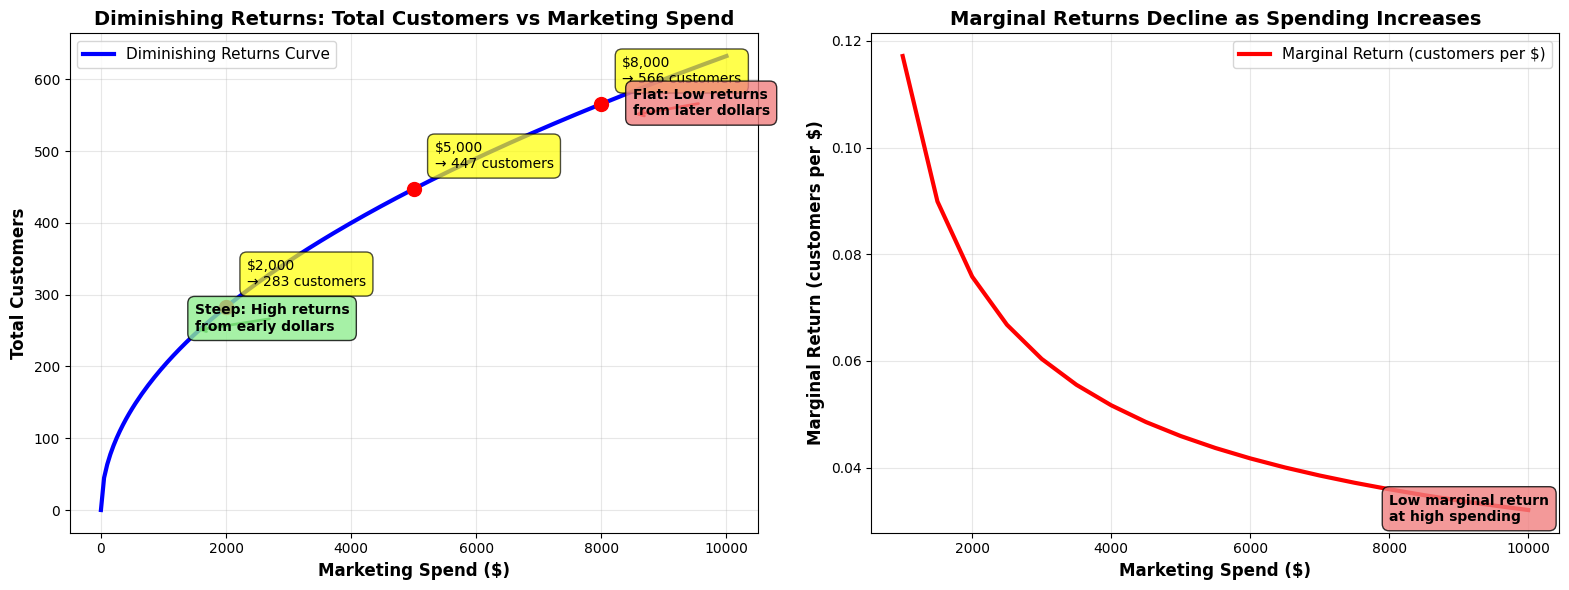


Visual Insights:
  - LEFT: Curve starts steep (high returns) but flattens (low returns)
  - RIGHT: Marginal returns decline continuously as spending increases
  - This shows why later dollars are less effective than early dollars


In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Total customers vs marketing spend (diminishing returns curve)
ax1.plot(spend_levels, customers, 'b-', linewidth=3, label='Diminishing Returns Curve')
ax1.set_xlabel('Marketing Spend ($)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Customers', fontsize=12, fontweight='bold')
ax1.set_title('Diminishing Returns: Total Customers vs Marketing Spend', 
             fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)

# Highlight key segments
for spend in [2000, 5000, 8000]:
    total = marketing_customers(spend)
    ax1.plot(spend, total, 'ro', markersize=10, zorder=3)
    ax1.annotate(f'${spend:,}\n→ {total:.0f} customers', 
                (spend, total), xytext=(15, 15), textcoords='offset points',
                fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Add annotations showing curve shape
ax1.annotate('Steep: High returns\nfrom early dollars', 
            (1500, 250), fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))

ax1.annotate('Flat: Low returns\nfrom later dollars', 
            (8500, 550), fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))

# Plot 2: Marginal returns (additional customers per $1000)
marginal_data = []
for spend in range(1000, 10001, 500):
    total = marketing_customers(spend)
    prev = marketing_customers(spend - 500) if spend > 0 else 0
    marginal = (total - prev) / 500  # customers per dollar for this $500 increment
    marginal_data.append({'Spend': spend, 'Marginal Return': marginal})

marginal_df = pd.DataFrame(marginal_data)

ax2.plot(marginal_df['Spend'], marginal_df['Marginal Return'], 'r-', linewidth=3, 
         label='Marginal Return (customers per $)')
ax2.set_xlabel('Marketing Spend ($)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Marginal Return (customers per $)', fontsize=12, fontweight='bold')
ax2.set_title('Marginal Returns Decline as Spending Increases', 
             fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

# Highlight declining trend
ax2.annotate('High marginal return\nat low spending', 
            (2000, 0.15), fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

ax2.annotate('Low marginal return\nat high spending', 
            (8000, 0.03), fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.8))

plt.tight_layout()
plt.show()

print("\nVisual Insights:")
print("  - LEFT: Curve starts steep (high returns) but flattens (low returns)")
print("  - RIGHT: Marginal returns decline continuously as spending increases")
print("  - This shows why later dollars are less effective than early dollars")


In [4]:
# Linear assumption: constant return per dollar
# If $1,000 produces 200 customers, assume $10 per customer
linear_rate = marketing_customers(1000) / 1000  # customers per dollar from first $1000

def linear_customers(marketing_spend):
    """Linear assumption: constant return per dollar"""
    return marketing_spend * linear_rate

# Compare linear vs nonlinear at different spending levels
comparison_data = []
for spend in [2000, 4000, 6000, 8000, 10000]:
    linear_total = linear_customers(spend)
    nonlinear_total = marketing_customers(spend)
    overestimate = linear_total - nonlinear_total
    pct_overestimate = (overestimate / nonlinear_total) * 100
    
    comparison_data.append({
        'Spend ($)': spend,
        'Linear Assumption\n(customers)': linear_total,
        'Nonlinear Reality\n(customers)': nonlinear_total,
        'Overestimate': overestimate,
        'Overestimate %': f'{pct_overestimate:.1f}%'
    })

comparison_df = pd.DataFrame(comparison_data)
print("LINEAR ASSUMPTION vs NONLINEAR REALITY")
print("=" * 80)
display(comparison_df.round(0))

print("\nKey Insight:")
print("  - Linear assumption overestimates results at higher spending levels")
print("  - The overestimate grows larger as spending increases")
print("  - This leads to poor decisions: expecting results that never materialize")


LINEAR ASSUMPTION vs NONLINEAR REALITY


,Spend ($),Linear Assumption\n(customers),Nonlinear Reality\n(customers),Overestimate,Overestimate %
0,2000,400.0,283.0,117.0,41.4%
1,4000,800.0,400.0,400.0,100.0%
2,6000,1200.0,490.0,710.0,144.9%
3,8000,1600.0,566.0,1034.0,182.8%
4,10000,2000.0,632.0,1368.0,216.2%



Key Insight:
  - Linear assumption overestimates results at higher spending levels
  - The overestimate grows larger as spending increases
  - This leads to poor decisions: expecting results that never materialize


## Step 5: Visualize Linear vs Nonlinear Comparison


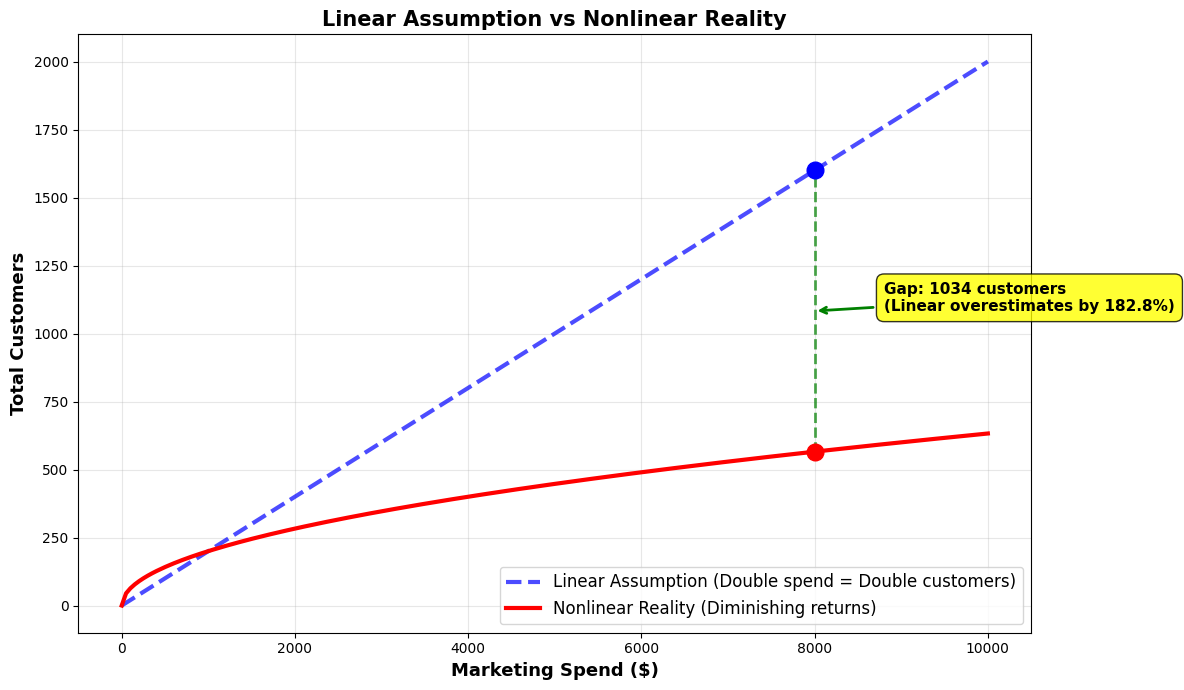


Critical Observation:
  - Blue dashed line: Linear assumption (unrealistic)
  - Red solid line: Nonlinear reality (diminishing returns)
  - The gap shows how much you overestimate if you assume linearity
  - This gap grows larger as spending increases


In [5]:
fig, ax = plt.subplots(figsize=(12, 7))

# Plot both relationships
linear_customers_plot = [linear_customers(spend) for spend in spend_levels]
ax.plot(spend_levels, linear_customers_plot, 'b--', linewidth=3, 
        label='Linear Assumption (Double spend = Double customers)', alpha=0.7)
ax.plot(spend_levels, customers, 'r-', linewidth=3, 
        label='Nonlinear Reality (Diminishing returns)')

ax.set_xlabel('Marketing Spend ($)', fontsize=13, fontweight='bold')
ax.set_ylabel('Total Customers', fontsize=13, fontweight='bold')
ax.set_title('Linear Assumption vs Nonlinear Reality', 
            fontsize=15, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12, loc='lower right')

# Highlight the gap at $8,000
highlight_spend = 8000
linear_val = linear_customers(highlight_spend)
nonlinear_val = marketing_customers(highlight_spend)
gap = linear_val - nonlinear_val

ax.plot(highlight_spend, linear_val, 'bo', markersize=12, zorder=3)
ax.plot(highlight_spend, nonlinear_val, 'ro', markersize=12, zorder=3)
ax.plot([highlight_spend, highlight_spend], [nonlinear_val, linear_val], 
        'g--', linewidth=2, alpha=0.7)
ax.annotate(f'Gap: {gap:.0f} customers\n(Linear overestimates by {gap/nonlinear_val*100:.1f}%)', 
            (highlight_spend, (linear_val + nonlinear_val) / 2),
            xytext=(50, 0), textcoords='offset points',
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))

plt.tight_layout()
plt.show()

print("\nCritical Observation:")
print("  - Blue dashed line: Linear assumption (unrealistic)")
print("  - Red solid line: Nonlinear reality (diminishing returns)")
print("  - The gap shows how much you overestimate if you assume linearity")
print("  - This gap grows larger as spending increases")


## Step 6: Identify Optimal Investment Level

With diminishing returns, there's a point where additional investment produces too little return. Let's find the optimal level:


In [6]:
# Calculate return on investment (ROI) at different spending levels
# Assume each customer is worth $50 in profit
customer_value = 50

roi_data = []
for spend in range(1000, 11000, 500):
    total_customers = marketing_customers(spend)
    total_revenue = total_customers * customer_value
    profit = total_revenue - spend
    roi = (profit / spend) * 100 if spend > 0 else 0
    # Calculate marginal ROI for this increment
    if spend > 1000:
        prev_spend = spend - 500
        prev_customers = marketing_customers(prev_spend)
        additional_customers = total_customers - prev_customers
        additional_revenue = additional_customers * customer_value
        additional_profit = additional_revenue - 500
        marginal_roi = (additional_profit / 500) * 100
    else:
        marginal_roi = roi
    
    roi_data.append({
        'Spend ($)': spend,
        'Total Customers': total_customers,
        'Total Profit ($)': profit,
        'ROI (%)': roi,
        'Marginal ROI (%)': marginal_roi
    })

roi_df = pd.DataFrame(roi_data)
print("RETURN ON INVESTMENT ANALYSIS")
print("=" * 80)
display(roi_df.round(2))

# Find optimal spending level (where marginal ROI is still positive but declining)
# Optimal is typically where marginal ROI is still reasonable (e.g., > 10%)
optimal_spend = None
for idx, row in roi_df.iterrows():
    if row['Marginal ROI (%)'] < 10 and optimal_spend is None:
        optimal_spend = row['Spend ($)'] - 500  # Previous level
        break

if optimal_spend is None:
    optimal_spend = 5000  # Default if not found

print(f"\nOptimal Investment Level: Approximately ${optimal_spend:,}")
print(f"  - Beyond this point, marginal returns become very small")
print(f"  - Additional investment produces diminishing value")
print(f"  - This is the 'sweet spot' for investment")


RETURN ON INVESTMENT ANALYSIS


,Spend ($),Total Customers,Total Profit ($),ROI (%),Marginal ROI (%)
0,1000,200.00,9000.00,900.00,900.00
1,1500,244.95,10747.45,716.50,349.49
2,2000,282.84,12142.14,607.11,278.94
3,2500,316.23,13311.39,532.46,233.85
4,3000,346.41,14320.51,477.35,201.82
5,3500,374.17,15208.29,434.52,177.56
6,4000,400.00,16000.00,400.00,158.34
7,4500,424.26,16713.20,371.40,142.64
8,5000,447.21,17360.68,347.21,129.50
9,5500,469.04,17952.08,326.40,118.28



Optimal Investment Level: Approximately $5,000
  - Beyond this point, marginal returns become very small
  - Additional investment produces diminishing value
  - This is the 'sweet spot' for investment


## Step 7: Visualize Optimal Investment Level


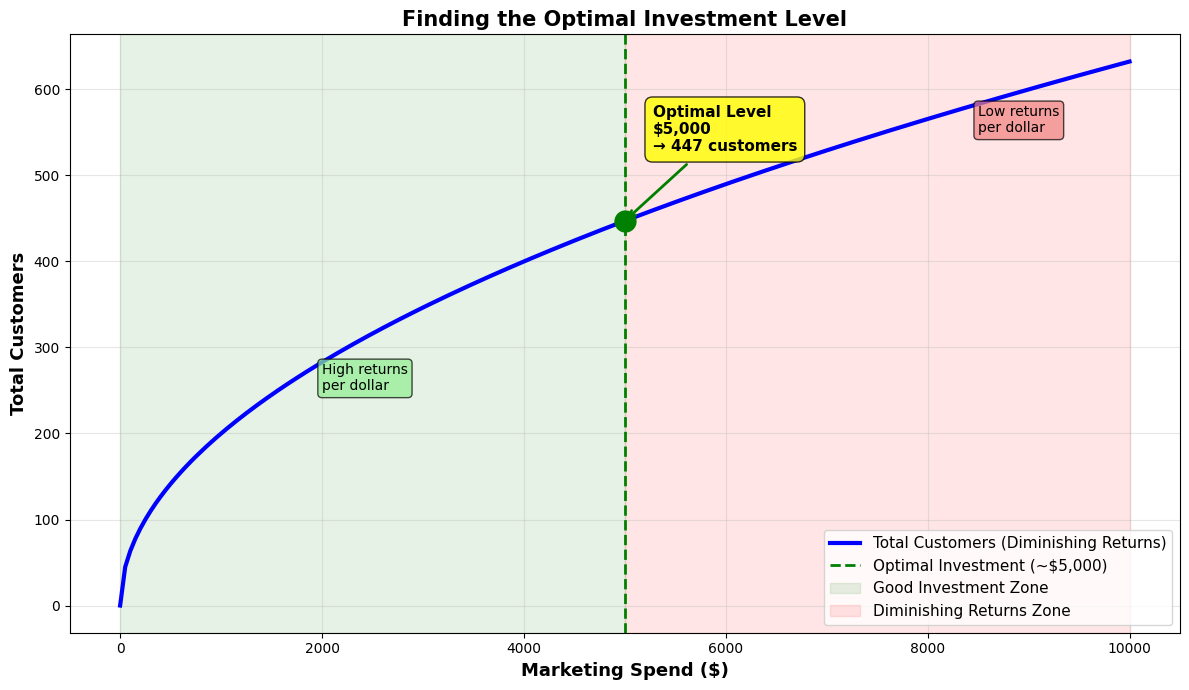


Key Insight:
  - Green zone: High returns, good investment
  - Red zone: Low returns, diminishing value
  - Optimal level balances total value with marginal returns
  - Beyond optimal, additional investment produces too little value


In [7]:
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the diminishing returns curve
ax.plot(spend_levels, customers, 'b-', linewidth=3, label='Total Customers (Diminishing Returns)')

# Mark optimal investment level
optimal_customers = marketing_customers(optimal_spend)
ax.axvline(x=optimal_spend, color='green', linestyle='--', linewidth=2, 
          label=f'Optimal Investment (~${optimal_spend:,})')
ax.plot(optimal_spend, optimal_customers, 'go', markersize=15, zorder=3)

# Shade regions
ax.axvspan(0, optimal_spend, alpha=0.1, color='green', label='Good Investment Zone')
ax.axvspan(optimal_spend, 10000, alpha=0.1, color='red', label='Diminishing Returns Zone')

ax.set_xlabel('Marketing Spend ($)', fontsize=13, fontweight='bold')
ax.set_ylabel('Total Customers', fontsize=13, fontweight='bold')
ax.set_title('Finding the Optimal Investment Level', 
            fontsize=15, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11, loc='lower right')

# Add annotations
ax.annotate(f'Optimal Level\n${optimal_spend:,}\n→ {optimal_customers:.0f} customers', 
            (optimal_spend, optimal_customers),
            xytext=(20, 50), textcoords='offset points',
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))

ax.annotate('High returns\nper dollar', 
            (2000, 250), fontsize=10,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7))

ax.annotate('Low returns\nper dollar', 
            (8500, 550), fontsize=10,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.7))

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("  - Green zone: High returns, good investment")
print("  - Red zone: Low returns, diminishing value")
print("  - Optimal level balances total value with marginal returns")
print("  - Beyond optimal, additional investment produces too little value")


## Summary: Understanding Diminishing Returns

**Diminishing Returns** means:
- Each additional unit of input produces less additional output
- First inputs are very effective (capture easy opportunities)
- Later inputs are less effective (face harder challenges)
- The relationship creates a curve that starts steep but flattens

**Why This Matters**:
- Helps identify optimal investment levels
- Prevents wasting money on investments with very low returns
- Sets realistic expectations (double input ≠ double output)
- Essential for interpreting prescriptive model recommendations

**Key Takeaway**: Most business relationships show diminishing returns. Understanding this helps you make better decisions about how much to invest and when to stop investing.
